# Heart Failure Prediction

---

__Importing libraries for the evaluation -__

In [1]:
import pandas as pd #for datasets 
import numpy as np #for mathematical operation on arrays and matrices
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt #for exploratory data analysis
import matplotlib.gridspec as gridspec #used to specify the geometry of the grid to place a subplot
import mpld3 as mpl #create interactive visualizations from Matplotlib plots
import warnings
warnings.filterwarnings("ignore")

---

__Importing the dataset -__

In [2]:
#importing the data with a variable name - "dataset"
dataset = pd.read_csv('/Users/--/Documents/RHUL 22-23/Project/Datasets/Heart Faliure Prediction/heart-failure.csv')

---

__Exploring the dataset -__

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
dataset.describe() #describing the dataset which will explain us much more about the data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
dataset.columns #all the column names that we have in our dataset

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
dataset.nunique() #measuring the unique values we have in our dataset in each column

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
null_values = dataset.isnull().sum() #actual count of the missing values
print(null_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [10]:
duplicates = dataset[dataset.duplicated()]

In [11]:
print(duplicates)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [12]:
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [13]:
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [14]:
dataset['FastingBS'].unique()

array([0, 1])

In [15]:
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
dataset['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [17]:
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [18]:
dataset['HeartDisease'].unique()

array([0, 1])

In [19]:
dataset.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

As we can see above, these numbers show us that how many people have a heart disease and how many of them not.

0 - people who does not have a heart disease.

1 - people who have heart disease.

In [20]:
dataset.groupby('Sex').size()

Sex
F    193
M    725
dtype: int64

Above shows the calculation of Males and Females in the following dataset.

In [21]:
dataset.groupby(['Sex', 'HeartDisease']).size()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
dtype: int64

Above evaluation shows the count for both Females and Males having and not having a heart disease.

In [22]:
dataset.shape

(918, 12)

In [23]:
dataset.size #size = rows * columns

11016

___

__Visualisation -__

Text(0.5, 1.0, 'Sex')

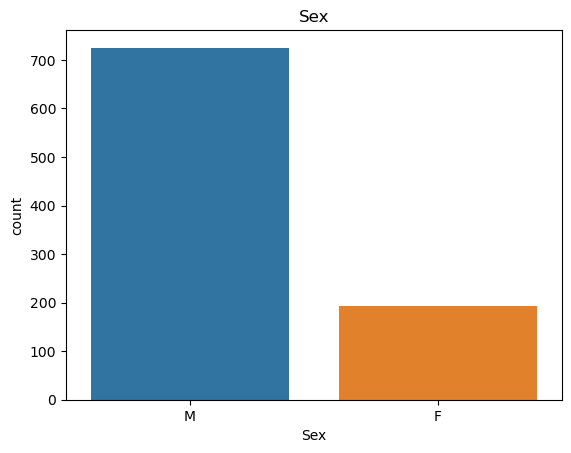

In [24]:
sns.countplot(data=dataset, x='Sex')
plt.title('Sex')

Text(0.5, 1.0, 'HeartDisease (0 = Negative, 1 = Positive)')

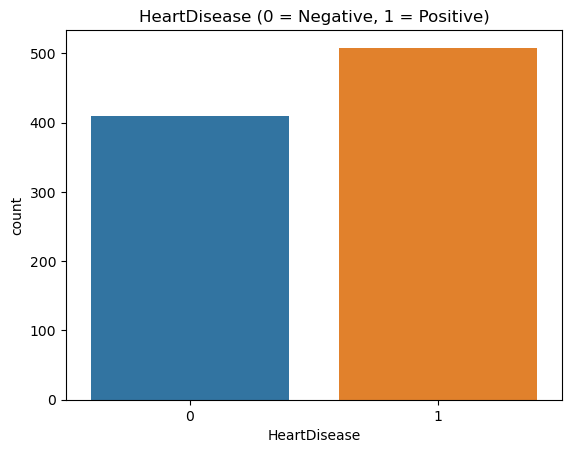

In [25]:
sns.countplot(data=dataset, x='HeartDisease')
plt.title('HeartDisease (0 = Negative, 1 = Positive)')

Underneath is the comparison of Age with all other features -

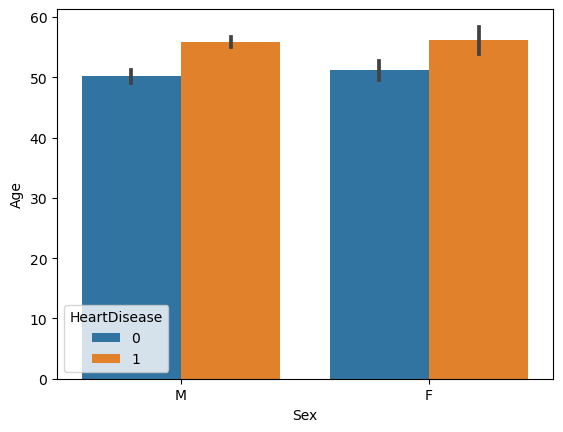

In [26]:
sns.barplot(x=dataset['Sex'],y=dataset['Age'],hue=dataset['HeartDisease'])
plt.show()

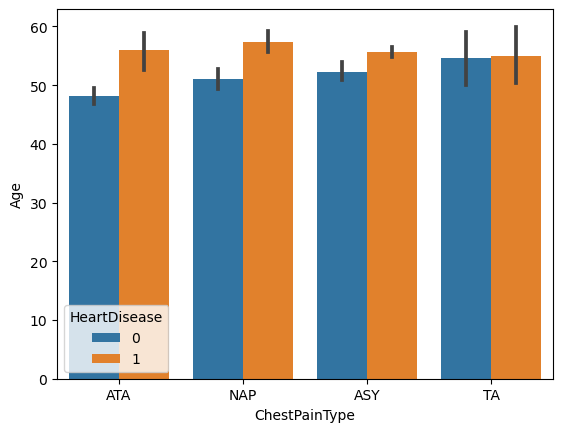

In [27]:
sns.barplot(x=dataset['ChestPainType'],y=dataset['Age'],hue=dataset['HeartDisease'])
plt.show()

<Axes: xlabel='RestingBP', ylabel='Age'>

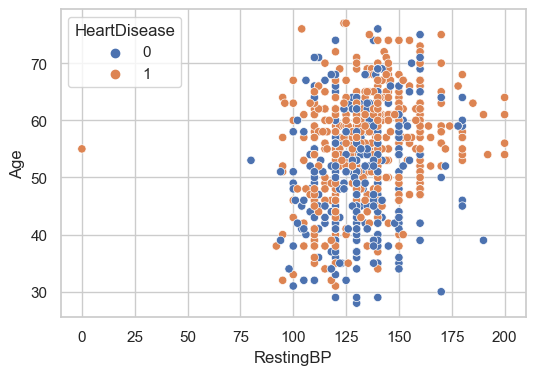

In [28]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(6, 4))  # Setting the size of the plot
sns.scatterplot(x=dataset['RestingBP'], y=dataset['Age'], hue=dataset['HeartDisease'], marker='o', color='b')

<Axes: xlabel='Cholesterol', ylabel='Age'>

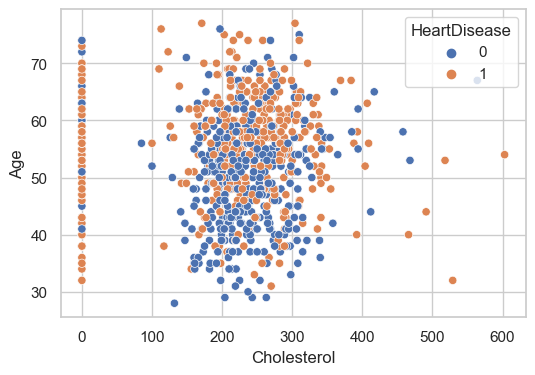

In [29]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(6, 4))  # Setting the size of the plot
sns.scatterplot(x=dataset['Cholesterol'], y=dataset['Age'], hue=dataset['HeartDisease'], marker='o', color='b')

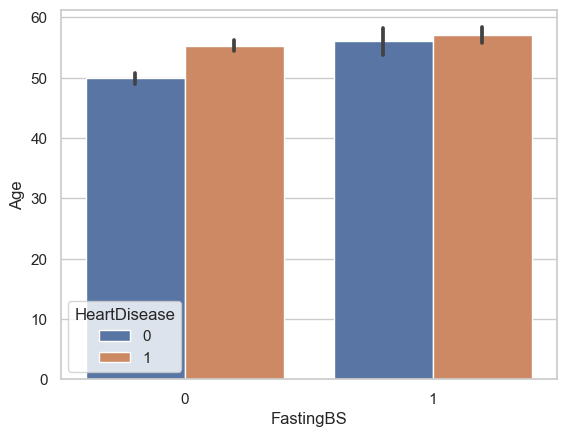

In [30]:
sns.barplot(x=dataset['FastingBS'],y=dataset['Age'],hue=dataset['HeartDisease'])
plt.show()

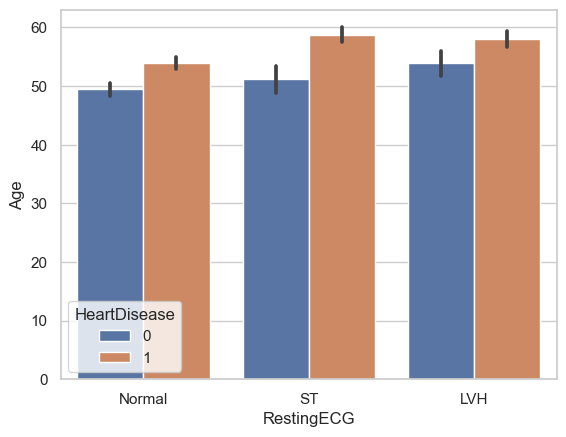

In [31]:
sns.barplot(x=dataset['RestingECG'],y=dataset['Age'],hue=dataset['HeartDisease'])
plt.show()

<Axes: xlabel='MaxHR', ylabel='Age'>

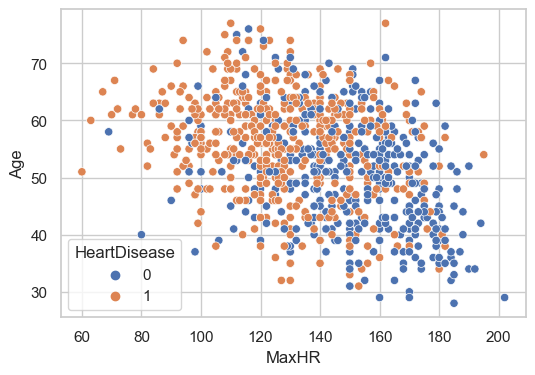

In [32]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(6, 4))  # Setting the size of the plot
sns.scatterplot(x=dataset['MaxHR'], y=dataset['Age'], hue=dataset['HeartDisease'], marker='o', color='b')

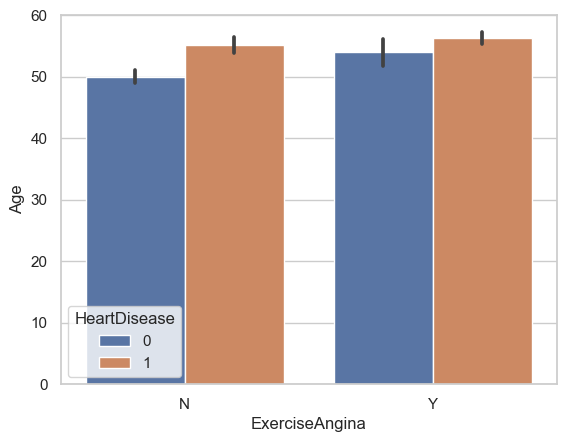

In [33]:
sns.barplot(x=dataset['ExerciseAngina'],y=dataset['Age'],hue=dataset['HeartDisease'])
plt.show()

<Axes: xlabel='Oldpeak', ylabel='Age'>

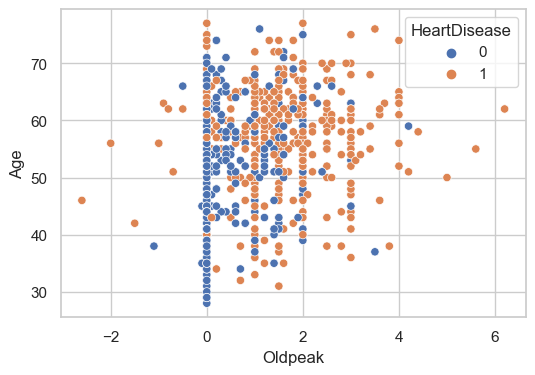

In [34]:
sns.set(style="whitegrid")  # Setting the style of the plot
plt.figure(figsize=(6, 4))  # Setting the size of the plot
sns.scatterplot(x=dataset['Oldpeak'], y=dataset['Age'], hue=dataset['HeartDisease'], marker='o', color='b')

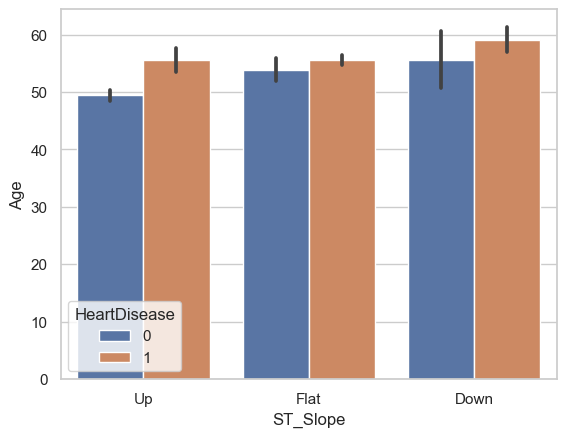

In [35]:
sns.barplot(x=dataset['ST_Slope'],y=dataset['Age'],hue=dataset['HeartDisease'])
plt.show()

___

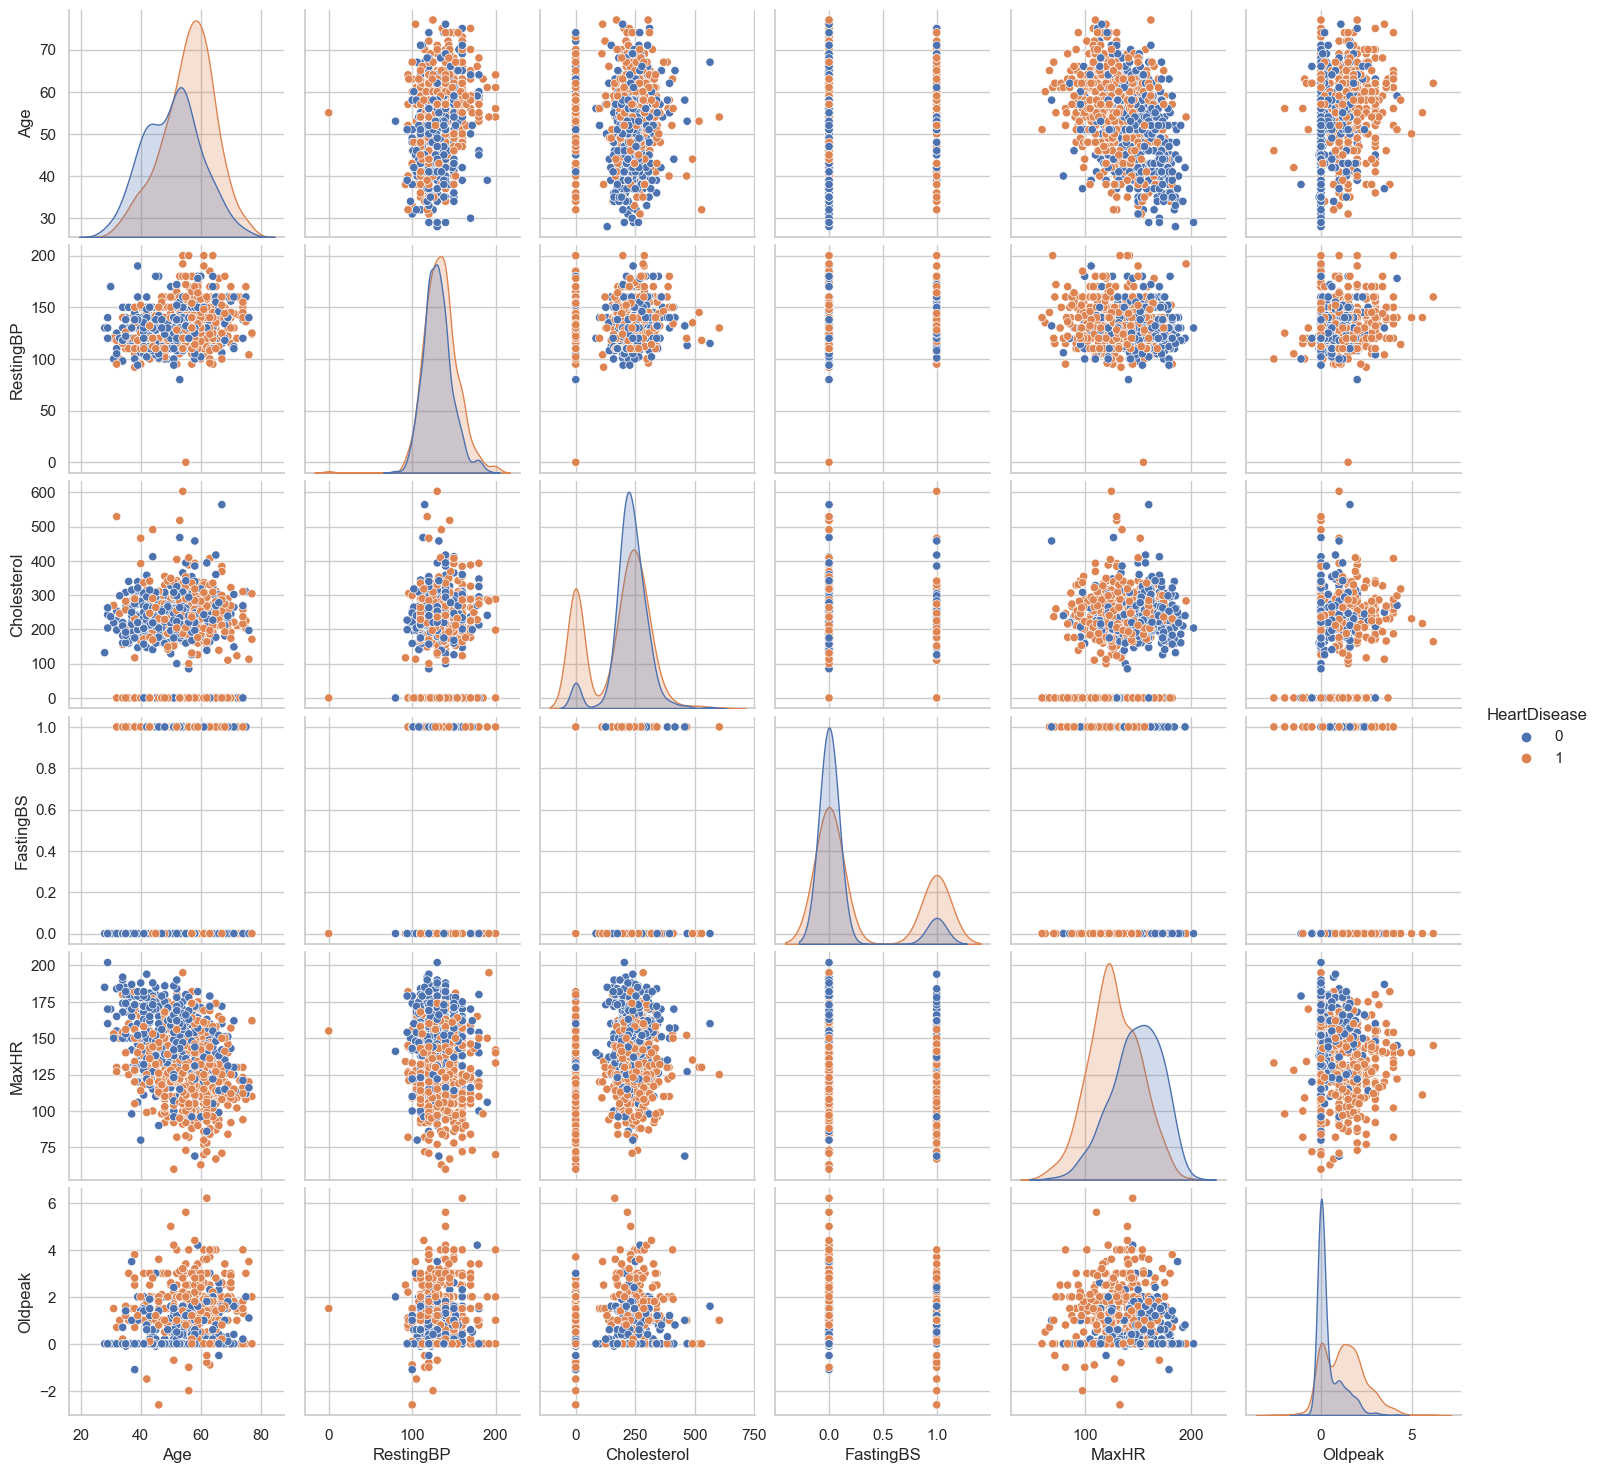

In [36]:
sns.pairplot(dataset,hue='HeartDisease')
plt.show()

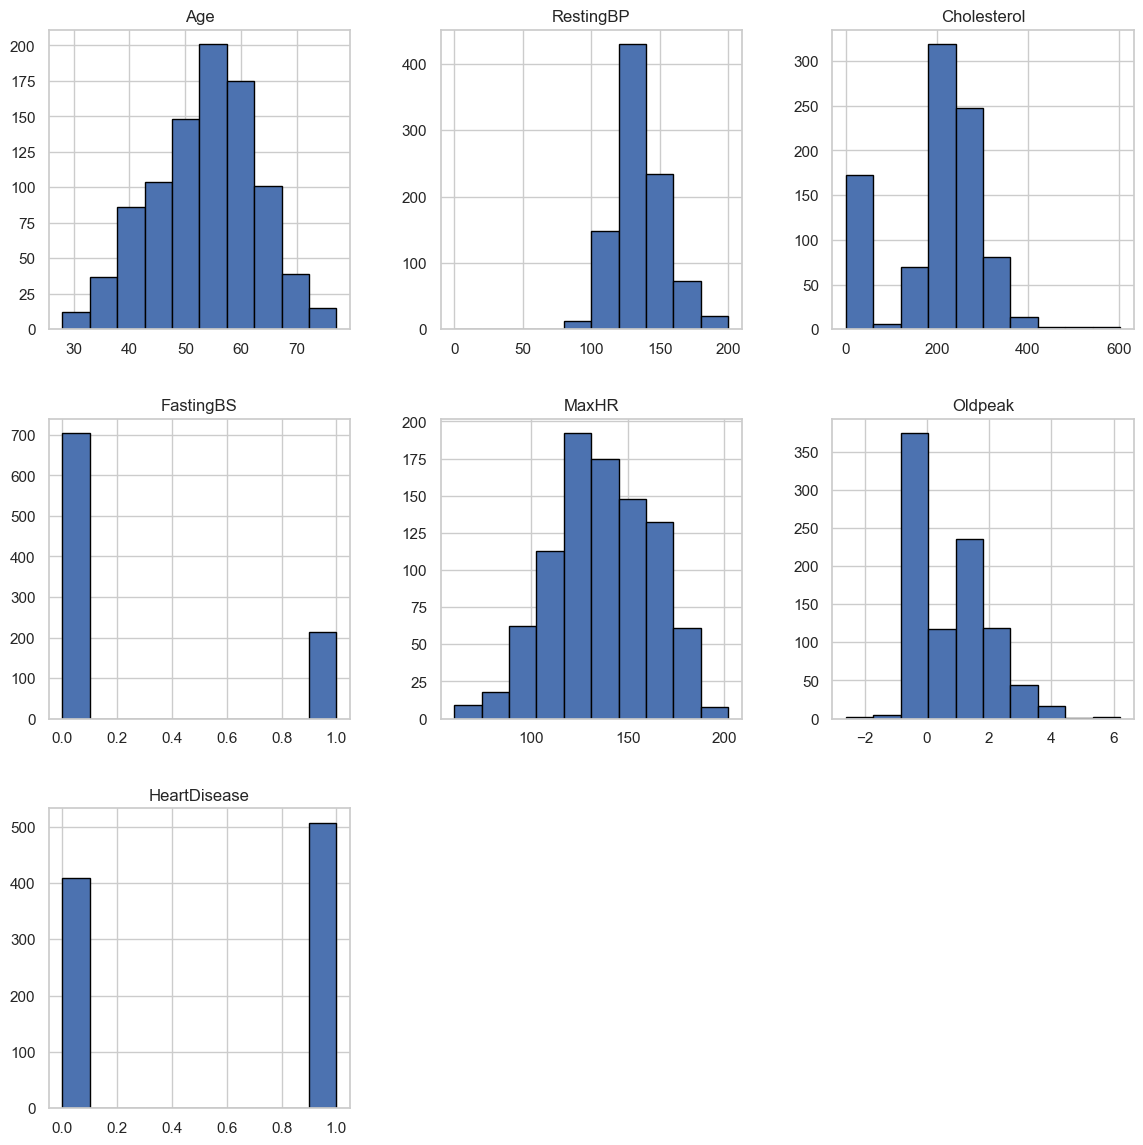

In [37]:
dataset.hist(figsize=(14,14),edgecolor='black')
plt.show()

In [38]:
features = list(dataset.columns[0:11]) #all the columns in a variable as a list

In [39]:
features

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

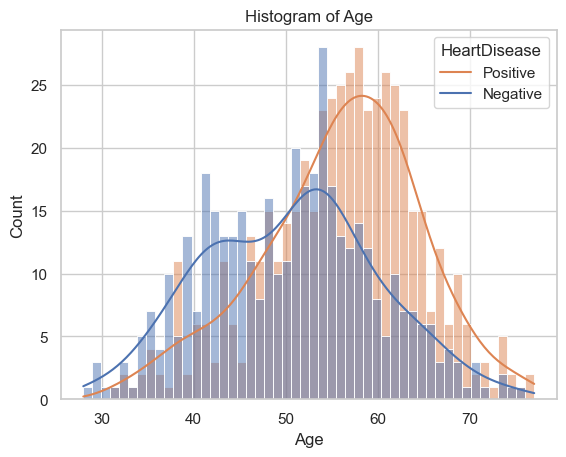

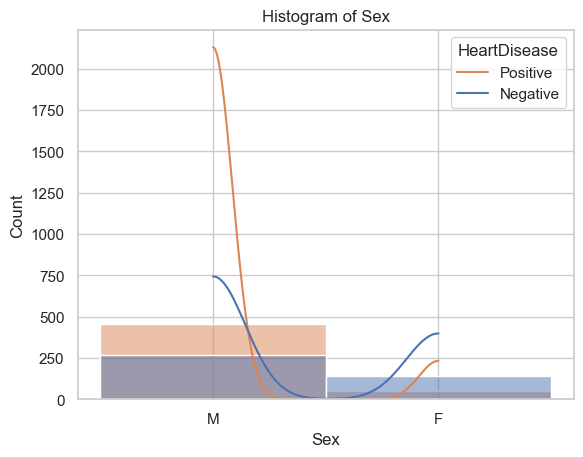

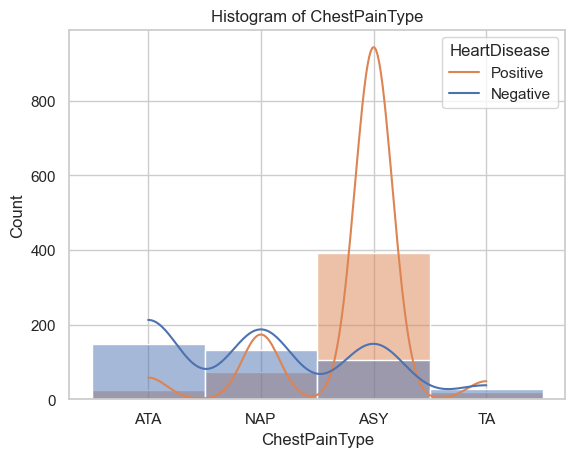

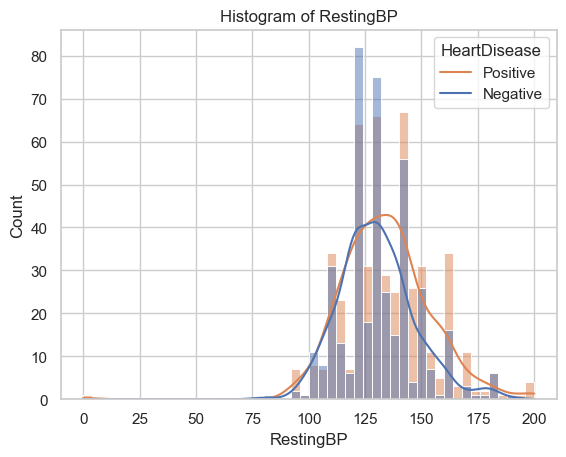

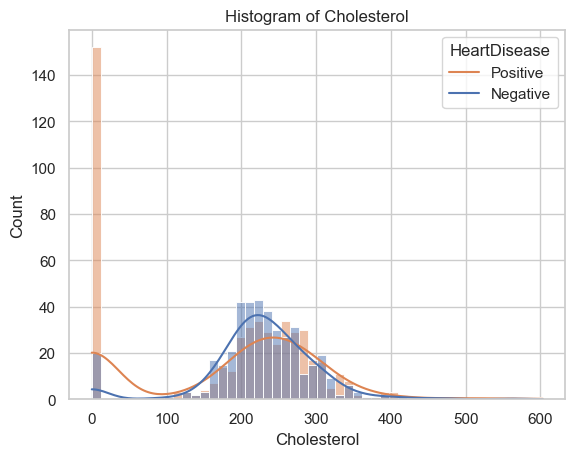

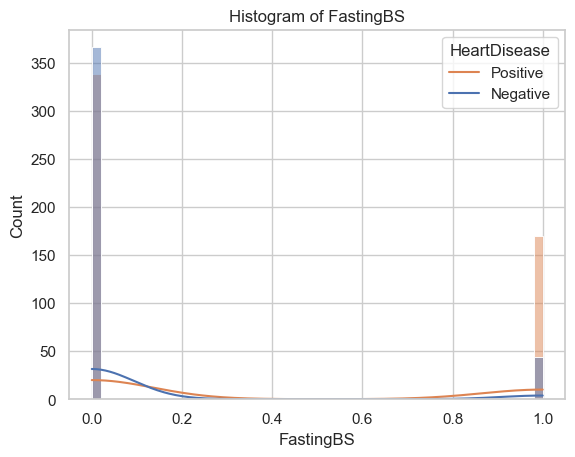

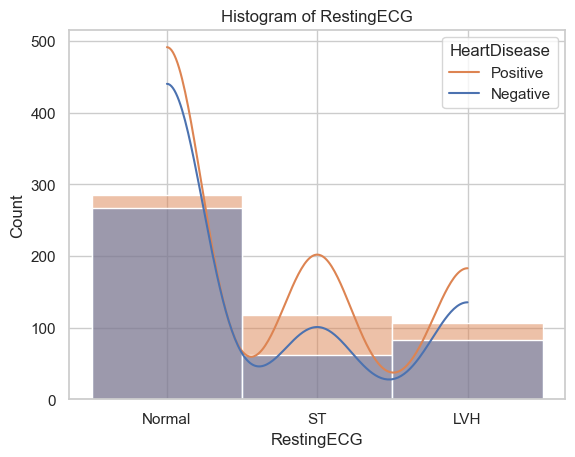

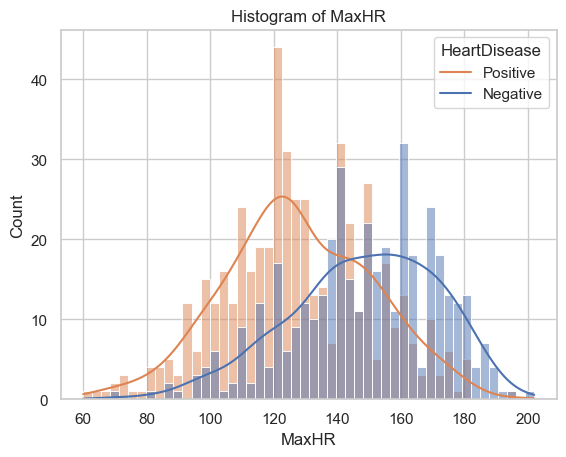

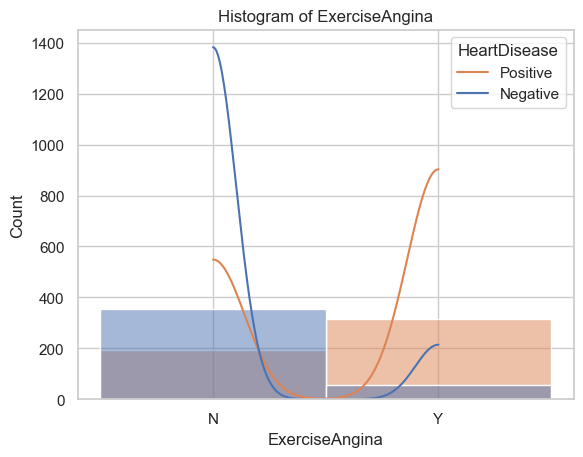

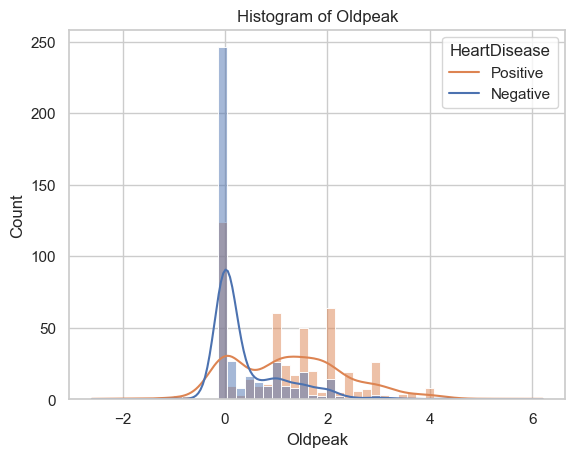

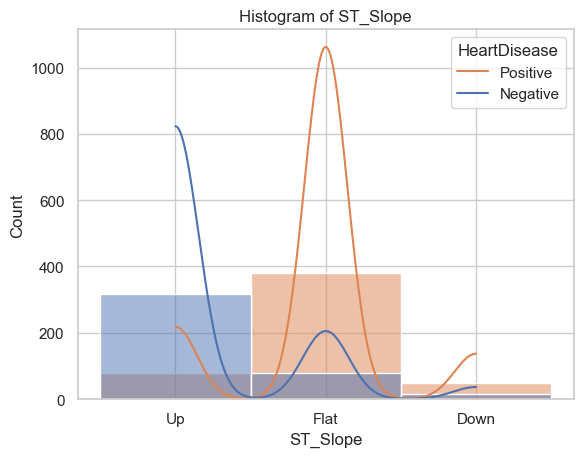

In [40]:
#creating a loop in which each feature will be compared with each diagnosis
for feature in features:
    plt.figure()
    sns.histplot(data=dataset, x=feature, hue='HeartDisease', bins=50, alpha=0.5, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.legend(title='HeartDisease', labels=["Positive", "Negative"])
    plt.show()

---

__Data Preprocessing for the features which has class 'object' -__

In [41]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Now we will change Sex, ChestPainType, RestingECG,ExerciseAngina, and ST_Slope:

In [44]:
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [45]:
#Changing the Sex column into categorical values
dataset['Sex'] = dataset['Sex'].map({'M':0,'F':1})

In [46]:
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [47]:
#Changing the ChestPainType column into categorical values
dataset['ChestPainType'] = dataset['ChestPainType'].map({'ATA':0,'NAP':1, 'ASY':2, 'TA':3})  

In [48]:
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [49]:
#Changing the RestingECG column into categorical values
dataset['RestingECG'] = dataset['RestingECG'].map({'Normal':0,'ST':1, 'LVH':2})  

In [50]:
dataset['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [51]:
#Changing the ExerciseAngina column into categorical values
dataset['ExerciseAngina'] = dataset['ExerciseAngina'].map({'N':0,'Y':1})  

In [52]:
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [53]:
#Changing the ST_Slope column into categorical values
dataset['ST_Slope'] = dataset['ST_Slope'].map({'Up':0,'Flat':1, 'Down':2})

In [54]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [55]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


---

__Standardisation -__

In [56]:
x = dataset.drop("HeartDisease", axis='columns')
y = dataset.HeartDisease

In [57]:
x.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [58]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardised_dataset = scaler.fit_transform(x)
standardised_dataset[:5]

array([[-1.4331398 , -0.51595242, -1.70557305,  0.41090889,  0.82507026,
        -0.55134134, -0.74917967,  1.38292822, -0.8235563 , -0.83243239,
        -1.05211381],
       [-0.47848359,  1.93816322, -0.53099236,  1.49175234, -0.17196105,
        -0.55134134, -0.74917967,  0.75415714, -0.8235563 ,  0.10566353,
         0.59607813],
       [-1.75135854, -0.51595242, -1.70557305, -0.12951283,  0.7701878 ,
        -0.55134134,  0.49224079, -1.52513802, -0.8235563 , -0.83243239,
        -1.05211381],
       [-0.5845565 ,  1.93816322,  0.64358833,  0.30282455,  0.13903954,
        -0.55134134, -0.74917967, -1.13215609,  1.21424608,  0.57471149,
         0.59607813],
       [ 0.05188098, -0.51595242, -0.53099236,  0.95133062, -0.0347549 ,
        -0.55134134, -0.74917967, -0.5819814 , -0.8235563 , -0.83243239,
        -1.05211381]])

In [60]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


---

__Train and Test -__

In [61]:
from sklearn.model_selection import train_test_split

x_train_one, x_test_one, y_train, y_test = train_test_split(standardised_dataset, y, random_state = 10, shuffle=True)

---

__Feature Selection -__

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif
no_of_features_to_choose = 4
best_selected = SelectKBest(score_func = f_classif, k = no_of_features_to_choose)
x_train = best_selected.fit_transform(x_train_one, y_train)
x_test = best_selected.transform(x_test_one)

---

__Libraries imported for Bagging and Boosting (Ensemble Methods) -__

In [63]:
from sklearn.ensemble import BaggingClassifier #Bagging
from sklearn.ensemble import RandomForestClassifier #Bagging
from sklearn.tree import DecisionTreeClassifier #Bagging
from sklearn.linear_model import LogisticRegression #Bagging
from sklearn.ensemble import AdaBoostClassifier #Boosting (Decision tree will be used as base estimator)
from sklearn.ensemble import GradientBoostingClassifier #Boosting
import xgboost as xgb #Boosting
from sklearn.metrics import accuracy_score #Accuracy
from sklearn.model_selection import cross_val_score #Cross-Validation

---

__Random Forest with OOB and cross-validation score (Bagging) -__

In [64]:
# Define the random forest classifier
randfo_model = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)
 
# Train the random forest model model
randfo_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = randfo_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(randfo_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy_randfo = accuracy_score(y_test, y_prediction)

#Taking the OOB score
oob_score = randfo_model.oob_score_

#print accuracy, cross-validation and OOB score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_randfo))
print("OOB Score : %s" % "{0:.3%}".format(oob_score))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 75.652%
OOB Score : 77.035%
Cross-Validation Scores :
84.783%
85.326%
81.522%
80.328%
73.224%


__Decision Tree (Bagging) -__

In [65]:
# Define the bagging classifier using the Decision tree model as the base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
 
# Train the bagging model
bagging_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = bagging_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(bagging_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy_dtrees = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_dtrees))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 74.783%
Cross-Validation Scores :
82.065%
81.522%
82.609%
79.781%
68.852%


In [66]:
# Define the bagging classifier using the Decision tree model as the base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
 
# Train the bagging model
bagging_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = bagging_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(bagging_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 76.522%
Cross-Validation Scores :
84.783%
80.978%
82.609%
78.142%
72.678%


__Logistic Regression (Bagging) -__

Normal Logistic Regression -

In [67]:
# Creating a logistic regression model
logisticreg_model = LogisticRegression()

# Training the logistic regression model
logisticreg_model.fit(x_train, y_train)

# Make predictions on the test set
y_prediction = logisticreg_model.predict(x_test)

# Cross Validation score
scores = cross_val_score(logisticreg_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy = logisticreg_model.score(x_test, y_prediction)

# Print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 100.000%
Cross-Validation Scores :
80.978%
78.804%
82.065%
81.967%
74.863%


Logistic Regression using Bagging Classifier -

In [68]:
# Define the bagging classifier using the Logistic Regression model as the base estimator
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=42)
 
# Train the bagging model
bagging_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = bagging_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(bagging_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy_logreg = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_logreg))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
80.978%
78.804%
80.978%
81.421%
74.863%


In [69]:
# Define the bagging classifier using the Logistic Regression model as the base estimator
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=42)
 
# Train the bagging model
bagging_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = bagging_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(bagging_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
80.978%
78.804%
82.065%
81.421%
74.863%


__AdaBoost using Decision Tree as a base estimator (Boosting) -__

In [70]:
# Define AdaBoost using the Decision tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
 
# Train the boosting model
adaboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = adaboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(adaboost_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy_adaBdtree = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_adaBdtree))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 75.652%
Cross-Validation Scores :
77.174%
72.826%
78.261%
77.596%
67.760%


In [71]:
# Define AdaBoost using the Decision tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
 
# Train the boosting model
adaboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = adaboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(adaboost_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 75.652%
Cross-Validation Scores :
77.174%
72.826%
78.261%
77.596%
67.760%


__AdaBoost using Logistic regression as a base estimator (Boosting) -__

In [72]:
# Define AdaBoost using the Logistic regression model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=42)
 
# Train the boosting model
adaboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = adaboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(adaboost_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy_adaBlogreg = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_adaBlogreg))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
80.978%
81.522%
80.435%
81.421%
76.503%


In [73]:
# Define AdaBoost using the Logistic regression model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=42)
 
# Train the boosting model
adaboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = adaboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(adaboost_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
80.435%
79.348%
81.522%
81.421%
73.224%


__Gradient Boosting (Boosting) -__

In [74]:
# Define Gradient Boosting
gradientboost_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

# Train the boosting model
gradientboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = gradientboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(gradientboost_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy_gradB = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_gradB))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 83.913%
Cross-Validation Scores :
91.304%
84.783%
79.891%
79.235%
72.131%


In [75]:
# Define Gradient Boosting
gradientboost_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train the boosting model
gradientboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = gradientboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(gradientboost_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 82.609%
Cross-Validation Scores :
87.500%
85.870%
81.522%
80.328%
74.863%


__XGBoost (Boosting) -__

In [76]:
# Define XGBoost
xgboost_model = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

# Train the boosting model
xgboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = xgboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(xgboost_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy_xgB = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_xgB))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
91.848%
82.609%
80.435%
75.956%
72.678%


In [77]:
# Define XGBoost
xgboost_model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train the boosting model
xgboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = xgboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(xgboost_model, standardised_dataset, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 78.696%
Cross-Validation Scores :
88.043%
85.870%
83.152%
80.328%
74.317%


__Comparison of all the algorithms with their accuracy's -__

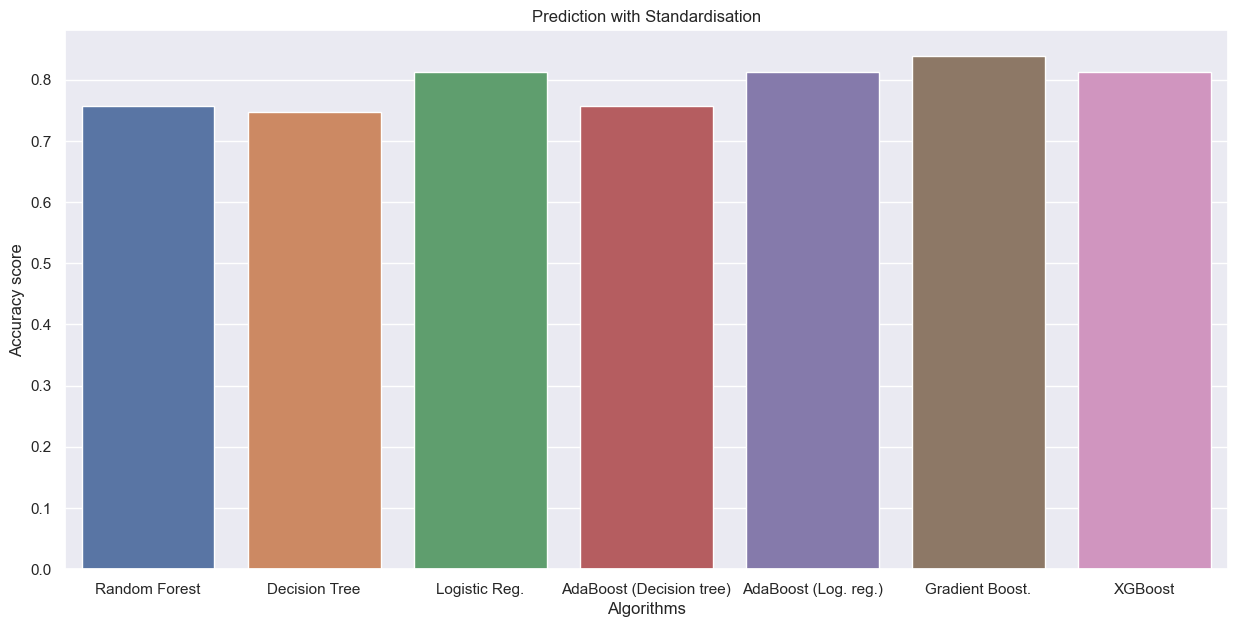

In [78]:
algos = ['Random Forest', 'Decision Tree','Logistic Reg.', 'AdaBoost (Decision tree)', 'AdaBoost (Log. reg.)', 'Gradient Boost.', 'XGBoost']
accuracies = [accuracy_randfo, accuracy_dtrees ,accuracy_logreg, accuracy_adaBdtree, accuracy_adaBlogreg, accuracy_gradB, accuracy_xgB]

sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Prediction with Standardisation")


sns.barplot(x = algos, y = accuracies)
plt.show()